# Uitdaging: Tekst analyseren over Data Science

In dit voorbeeld doen we een eenvoudige oefening die alle stappen van een traditioneel data science-proces omvat. Je hoeft geen code te schrijven, je kunt gewoon op de cellen hieronder klikken om ze uit te voeren en het resultaat te bekijken. Als uitdaging word je aangemoedigd om deze code met verschillende gegevens uit te proberen.

## Doel

In deze les hebben we verschillende concepten besproken die te maken hebben met Data Science. Laten we proberen meer gerelateerde concepten te ontdekken door middel van **tekstmining**. We beginnen met een tekst over Data Science, halen daar trefwoorden uit en proberen vervolgens het resultaat te visualiseren.

Als tekst gebruik ik de pagina over Data Science van Wikipedia:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## Stap 1: De gegevens ophalen

De eerste stap in elk data science-proces is het verkrijgen van de gegevens. We gebruiken de bibliotheek `requests` om dit te doen:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## Stap 2: Het transformeren van de gegevens

De volgende stap is om de gegevens om te zetten in een vorm die geschikt is voor verwerking. In ons geval hebben we de HTML-broncode van de pagina gedownload, en we moeten deze omzetten naar platte tekst.

Er zijn veel manieren waarop dit kan worden gedaan. We zullen gebruik maken van het eenvoudigste ingebouwde [HTMLParser](https://docs.python.org/3/library/html.parser.html)-object van Python. We moeten de `HTMLParser`-klasse uitbreiden en de code definiëren die alle tekst binnen HTML-tags verzamelt, behalve de `<script>`- en `<style>`-tags.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## Stap 3: Inzichten verkrijgen

De belangrijkste stap is om onze data om te zetten in een vorm waaruit we inzichten kunnen halen. In ons geval willen we trefwoorden uit de tekst halen en bekijken welke trefwoorden het meest betekenisvol zijn.

We gebruiken een Python-bibliotheek genaamd [RAKE](https://github.com/aneesha/RAKE) voor het extraheren van trefwoorden. Laten we eerst deze bibliotheek installeren, mocht deze nog niet aanwezig zijn:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


De belangrijkste functionaliteit is beschikbaar via het `Rake`-object, dat we kunnen aanpassen met enkele parameters. In ons geval stellen we de minimale lengte van een trefwoord in op 5 tekens, de minimale frequentie van een trefwoord in het document op 3, en het maximale aantal woorden in een trefwoord op 2. Voel je vrij om met andere waarden te experimenteren en het resultaat te observeren.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

We hebben een lijst met termen verkregen, samen met de bijbehorende mate van belangrijkheid. Zoals je kunt zien, staan de meest relevante disciplines, zoals machine learning en big data, bovenaan de lijst.

## Stap 4: Het resultaat visualiseren

Mensen kunnen gegevens het beste interpreteren in visuele vorm. Daarom is het vaak zinvol om de gegevens te visualiseren om inzichten te verkrijgen. We kunnen de `matplotlib`-bibliotheek in Python gebruiken om een eenvoudige verdeling van de trefwoorden met hun relevantie te plotten:


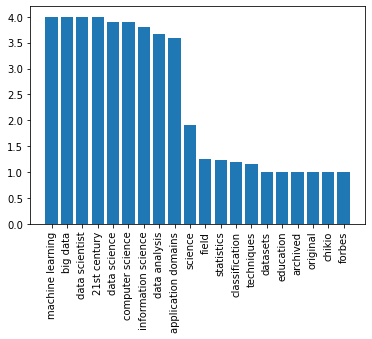

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Er is echter een nog betere manier om woordfrequenties te visualiseren - met behulp van **Word Cloud**. We zullen een andere bibliotheek moeten installeren om de word cloud van onze trefwoordenlijst te plotten.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud`-object is verantwoordelijk voor het verwerken van originele tekst, of een vooraf berekende lijst van woorden met hun frequenties, en retourneert een afbeelding, die vervolgens kan worden weergegeven met `matplotlib`:


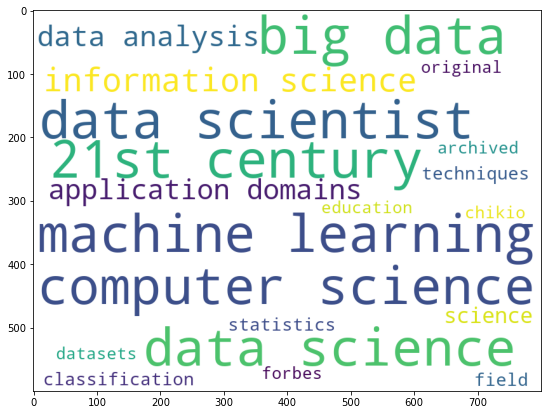

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

We kunnen ook de originele tekst doorgeven aan `WordCloud` - laten we kijken of we een vergelijkbaar resultaat kunnen krijgen:


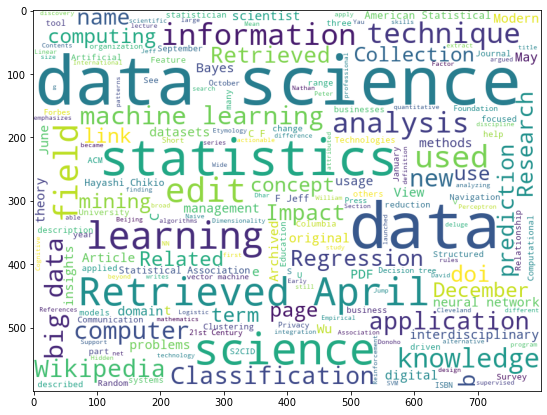

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Je kunt zien dat de woordwolk er nu indrukwekkender uitziet, maar het bevat ook veel ruis (bijvoorbeeld niet-gerelateerde woorden zoals `Retrieved on`). Daarnaast krijgen we minder trefwoorden die uit twee woorden bestaan, zoals *data scientist* of *computer science*. Dit komt doordat het RAKE-algoritme veel beter werk levert bij het selecteren van goede trefwoorden uit tekst. Dit voorbeeld illustreert het belang van data-voorbewerking en opschoning, omdat een helder beeld aan het einde ons in staat stelt betere beslissingen te nemen.

In deze oefening hebben we een eenvoudig proces doorlopen om enige betekenis te halen uit Wikipedia-tekst, in de vorm van trefwoorden en een woordwolk. Dit voorbeeld is vrij simpel, maar het laat goed alle typische stappen zien die een datawetenschapper doorloopt bij het werken met data, van data-acquisitie tot visualisatie.

In onze cursus zullen we al deze stappen in detail bespreken.



---

**Disclaimer**:  
Dit document is vertaald met behulp van de AI-vertalingsservice [Co-op Translator](https://github.com/Azure/co-op-translator). Hoewel we streven naar nauwkeurigheid, dient u zich ervan bewust te zijn dat geautomatiseerde vertalingen fouten of onnauwkeurigheden kunnen bevatten. Het originele document in de oorspronkelijke taal moet worden beschouwd als de gezaghebbende bron. Voor kritieke informatie wordt professionele menselijke vertaling aanbevolen. Wij zijn niet aansprakelijk voor misverstanden of verkeerde interpretaties die voortvloeien uit het gebruik van deze vertaling.
